In [8]:
# TensorFlow and tf.keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(0)

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X = np.concatenate([x_train,x_test], axis=0)
labels = np.concatenate([y_train,y_test], axis=0)

In [5]:
# Transofrma array a N vectores de dimensión 1
nsamples, nx, ny = X.shape
X_samples = X.reshape((nsamples,nx*ny))

In [6]:
# Tipo de dato de las etiquetas
labels.dtype

dtype('uint8')

# Variabilidad del conjunto

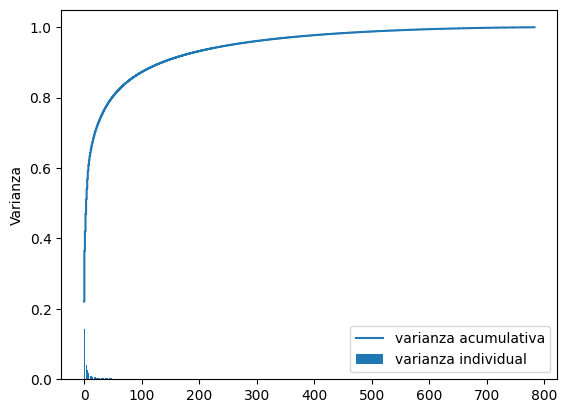

In [26]:
# Paso 1: Estandarización de los datos (var = 1, desv = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X_samples)

# Paso 2: Obtener matriz de covarianza
cov_mat = np.cov(X_std.T)

# Paso 3: Descomponer la matriz de covarianza en eigenvectores y eigenvalores
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Paso 4: Ordenar eigenvalores de manera decreciente
tot = sum(eigen_vals) # Suma de eigenvals
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse = True)]

# Paso 5: Seleccionar los k eigenvectores con los k mayores eigenvalores; con k la dimensión de un nuevo subespacio
# Gráfica
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(len(var_exp)), var_exp, label = 'varianza individual', align = 'center')
plt.step(range(len(cum_var_exp)), cum_var_exp, where = 'mid', label = 'varianza acumulativa')
plt.legend(loc = 'best')
plt.ylabel('Varianza')
plt.show()

Siguiendo este análisis, se requerirían aproximadamente 50 dimensiones para representar el 80% de la varianza acumulada.

# PCA

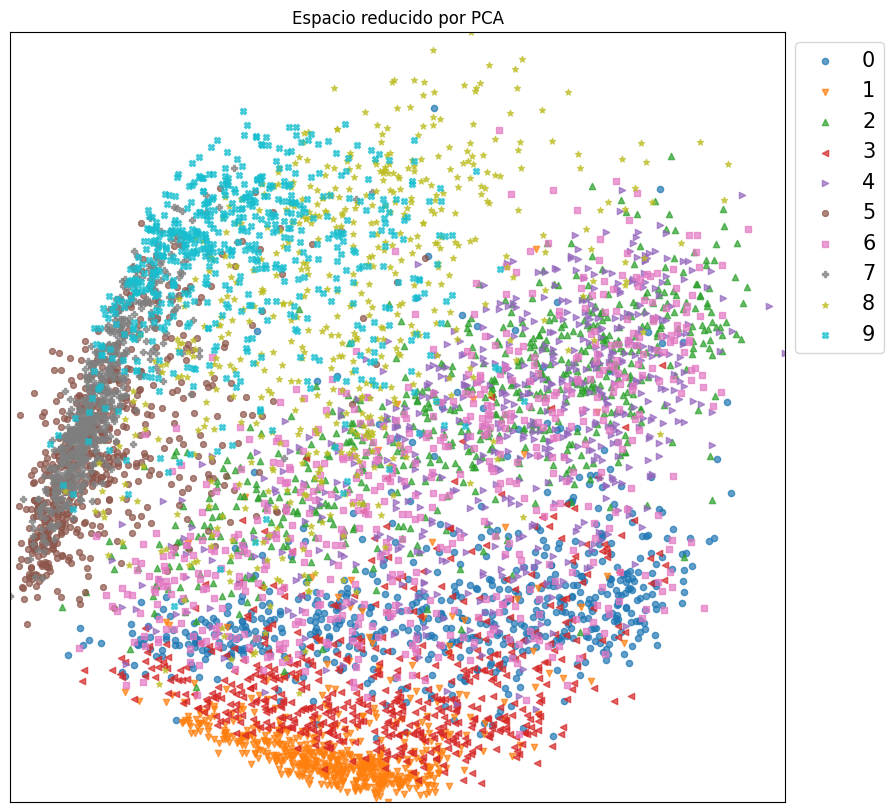

In [24]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_samples)

# Selecciona aleatoriamente 6000 índices de X_pca
random_indx = np.random.choice(len(X_pca), 6000, replace=False)
X_pca = X_pca[random_indx]
y_pca = labels[random_indx]

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_pca[y_pca==i].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_pca[:,0]) - 0.5, max(X_pca[:,0]) + 0.5)
plt.ylim(min(X_pca[:,1]) - 0.5, max(X_pca[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por PCA')
plt.show()

En este caso se escogieron sólo 2 componentes principales y, al analizar la gráfica, no parece que las direcciones de los eigenvectores escogidos en la reducción de la dimensionalidad refleje de manera aceptable la variabilidad del conjunto de datos. Quizás utilizando más componentes, o una técnica de reducción no lineal.

# t-SNE


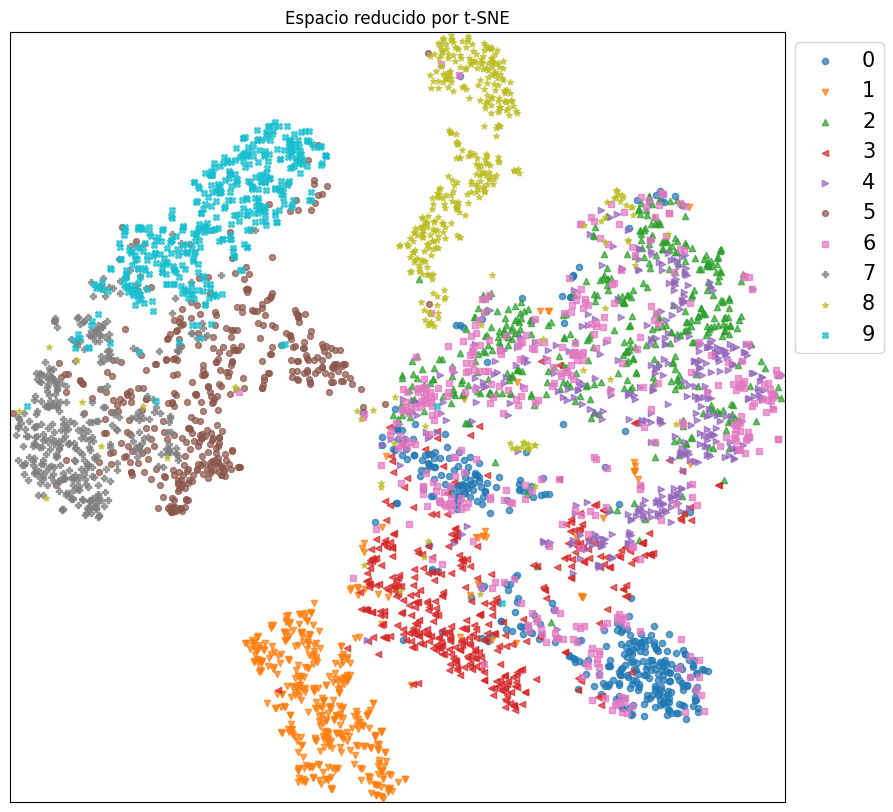

In [36]:
from sklearn.manifold import TSNE

# Aplica PCA para reducir la dimensionalidad a 2
tsne = TSNE(n_components=2)

# Selecciona aleatoriamente 6000 índices de X_tsne
random_indx = np.random.choice(len(X_samples), 4000, replace=False)
X_tsne = X_samples[random_indx]
y_tsne = labels[random_indx]
X_tsne = tsne.fit_transform(X_tsne) # Se ajusta aquí para reducir el número de muestras

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_tsne[y_tsne==i].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_tsne[:,0]) - 0.5, max(X_tsne[:,0]) + 0.5)
plt.ylim(min(X_tsne[:,1]) - 0.5, max(X_tsne[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por t-SNE')
plt.show()

Esta técnica realiza un mejor trabajo al capturar en dos dimensiones la variabilidad de los datos correspondiente a cada categoría. Sin embargo, aún tiene problemas.

# KernelPCA

Para problemas no lineales se utiliza una versión kernelizada del PCA. De este modo hay una mayor probabilidad de que la proyección mediante una transformación no lineal sea linealmente separable.

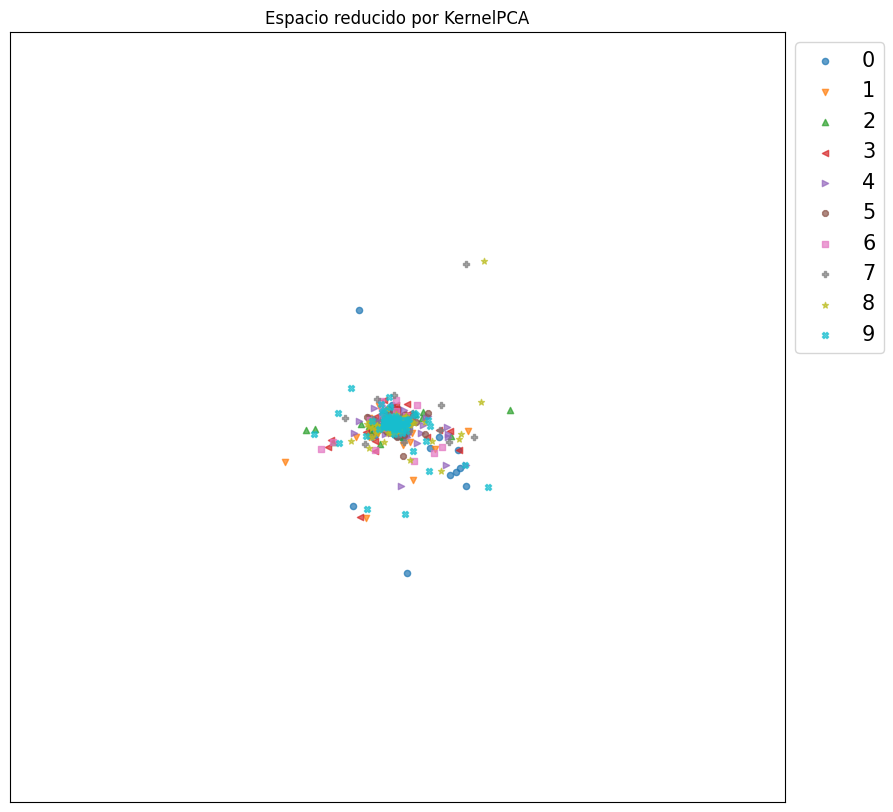

In [19]:
from sklearn.decomposition import KernelPCA

# Aplica KernelPCA para reducir la dimensionalidad a 2
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.2)

# Selecciona aleatoriamente 6000 índices de X_kpca
random_indx = np.random.choice(len(X_samples), 10000, replace=False)
X_kpca = X_samples[random_indx]
y_kpca = labels[random_indx]
X_kpca = kpca.fit_transform(X_kpca) # Se ajusta aquí para reducir el número de muestras

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_kpca[y_kpca==i].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_kpca[:,0]) - 0.5, max(X_kpca[:,0]) + 0.5)
plt.ylim(min(X_kpca[:,1]) - 0.5, max(X_kpca[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por KernelPCA')
plt.show()

Parece no hacer un buen trabajo tampoco, incluso peor que el logrado con PCA ya que todos se aglomeran en un punto (al menos usando el kernel rbf).

# LLE (Locally Linear Embedding)

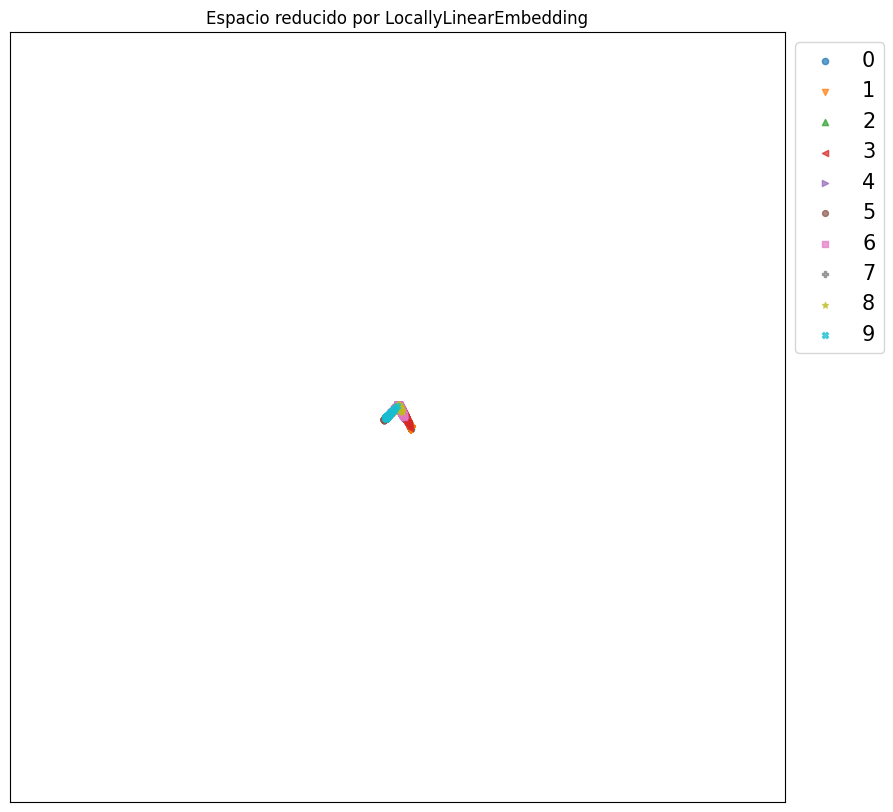

In [26]:
from sklearn.manifold import LocallyLinearEmbedding

# Aplica LocallyLinearEmbedding para reducir la dimensionalidad a 2
lle = LocallyLinearEmbedding(n_components=2)

# Selecciona aleatoriamente 6000 índices de X_lle
random_indx = np.random.choice(len(X_samples), 10000, replace=False)
X_lle= X_samples[random_indx]
y_lle = labels[random_indx]
X_lle = lle.fit_transform(X_lle) # Se ajusta aquí para reducir el número de muestras

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_lle[y_lle==i].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_lle[:,0]) - 0.5, max(X_lle[:,0]) + 0.5)
plt.ylim(min(X_lle[:,1]) - 0.5, max(X_lle[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por LocallyLinearEmbedding')
plt.show()

# Isomap

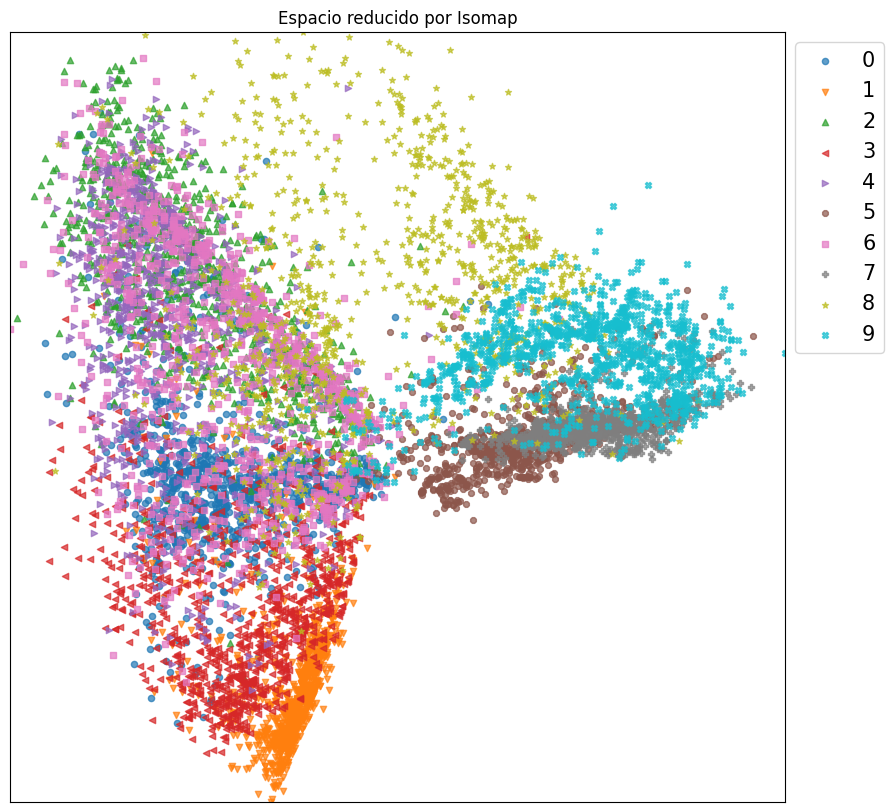

In [27]:
from sklearn.manifold import Isomap

# Aplica Isomap para reducir la dimensionalidad a 2
iso = Isomap(n_components=2)

# Selecciona aleatoriamente 6000 índices de X_iso
random_indx = np.random.choice(len(X_samples), 10000, replace=False)
X_iso= X_samples[random_indx]
y_iso = labels[random_indx]
X_iso = iso.fit_transform(X_iso) # Se ajusta aquí para reducir el número de muestras

# Grafica los primeros 2 componentes principales con imágenes de caras diminutas
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Define diferentes marcadores para cada clase
markers=['o','v','^','<','>','8','s','P','*','X']

# Grafica cada clase con un marcador diferente
for i, marker in enumerate(markers):
  ax.scatter(*X_iso[y_iso==i].T, label=i, marker=marker, alpha=0.7, s=20)

# Añade leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)

# Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
plt.xlim(min(X_iso[:,0]) - 0.5, max(X_iso[:,0]) + 0.5)
plt.ylim(min(X_iso[:,1]) - 0.5, max(X_iso[:,1]) + 0.5)

# Elimina las etiquetas de los ejes
plt.xticks([])
plt.yticks([])
plt.title('Espacio reducido por Isomap')
plt.show()

Luce como una forma mejorada de PCA.